In [16]:
import pandas as pd

data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [17]:
# Check missing values
data.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [18]:
# Fill missing numerical values with mean
data.fillna(data.mean(numeric_only=True), inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [19]:
data.isnull().sum()
data.shape


(395, 33)

Data Analysis

In [20]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [21]:
data[['G1','G2','G3','absences','studytime','freetime','goout']].corr()


,G1,G2,G3,absences,studytime,freetime,goout
G1,1.000000,0.852118,0.801468,-0.031003,0.160612,0.012613,-0.149104
G2,0.852118,1.000000,0.904868,-0.031777,0.135880,-0.013777,-0.162250
G3,0.801468,0.904868,1.000000,0.034247,0.097820,0.011307,-0.132791
absences,-0.031003,-0.031777,0.034247,1.000000,-0.062700,-0.058078,0.044302
studytime,0.160612,0.135880,0.097820,-0.062700,1.000000,-0.143198,-0.063904
freetime,0.012613,-0.013777,0.011307,-0.058078,-0.143198,1.000000,0.285019
goout,-0.149104,-0.162250,-0.132791,0.044302,-0.063904,0.285019,1.000000


Data visualization

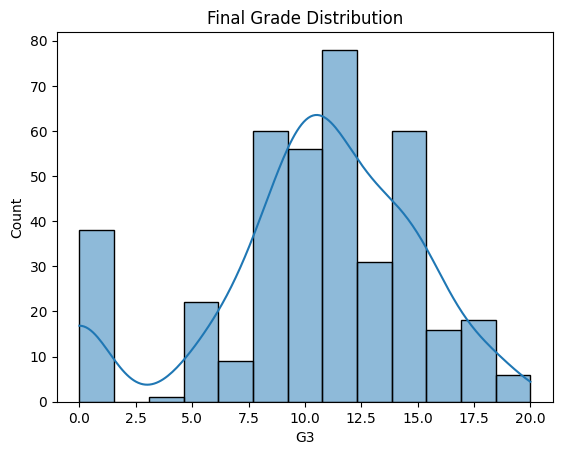

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['G3'], kde=True)
plt.title("Final Grade Distribution")
plt.show()


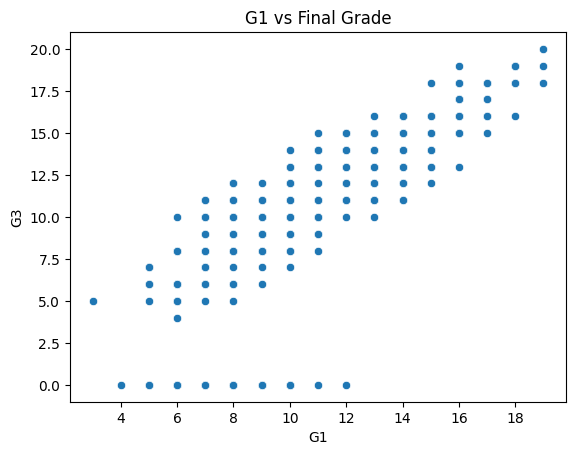

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='G1', y='G3', data=data)
plt.title("G1 vs Final Grade")
plt.show()


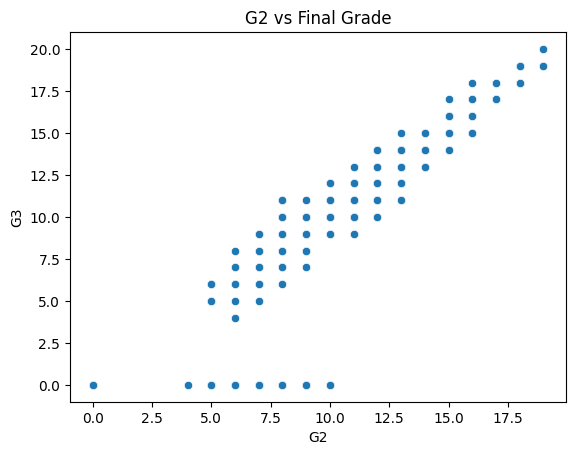

In [ ]:
sns.scatterplot(x='G2', y='G3', data=data)
plt.title("G2 vs Final Grade")
plt.show()

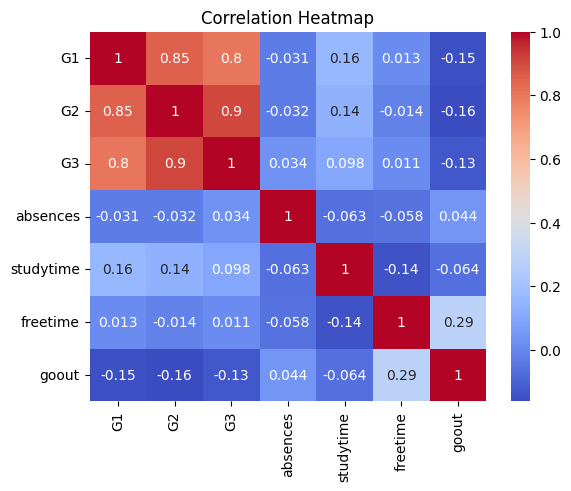

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    data[['G1','G2','G3','absences','studytime','freetime','goout']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title("Correlation Heatmap")
plt.show()


data preparation

In [ ]:
X = data[['G1','G2','studytime','absences','freetime','goout']]
y = data['G3']

TRAIN test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ML


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model evaluation

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4.297751099846848
R2 Score: 0.7904052088414327


prediction

In [25]:
pred = model.predict([[12, 14, 2, 4, 3, 2]])
print("Predicted Final Grade:", pred[0])

Predicted Final Grade: 13.618388859649002


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
